In [1]:
import numpy as np
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

In [3]:
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [22]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])

history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_test, y_test)
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 130us/step - loss: 0.1305 - acc: 0.8279 - val_loss: 0.1038 - val_acc: 0.8632
Epoch 2/20
25000/25000 [==============================] - 3s 103us/step - loss: 0.0707 - acc: 0.9147 - val_loss: 0.0858 - val_acc: 0.8861
Epoch 3/20
25000/25000 [==============================] - 3s 102us/step - loss: 0.0554 - acc: 0.9326 - val_loss: 0.0918 - val_acc: 0.8753
Epoch 4/20
25000/25000 [==============================] - 3s 102us/step - loss: 0.0456 - acc: 0.9460 - val_loss: 0.0881 - val_acc: 0.8798
Epoch 5/20
25000/25000 [==============================] - 3s 102us/step - loss: 0.0402 - acc: 0.9528 - val_loss: 0.0902 - val_acc: 0.8780
Epoch 6/20
25000/25000 [==============================] - 3s 103us/step - loss: 0.0336 - acc: 0.9629 - val_loss: 0.0989 - val_acc: 0.8684
Epoch 7/20
25000/25000 [==============================] - 3s 103us/step - loss: 0.0311 - acc: 0.9654 - val_loss: 0.0974 - 

In [7]:
# n = 1000
# x_val = x_train[:n]
# partial_x_train = x_train[n:]
# y_val = y_train[:n]
# partial_y_train = y_train[n:]

In [23]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

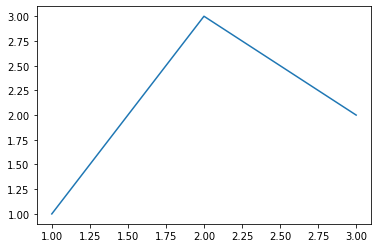

In [24]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3], [1, 3, 2])

In [25]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

# plt.plot([i for i in range(len(loss_values))], loss_values, 'bo', label='Training loss')

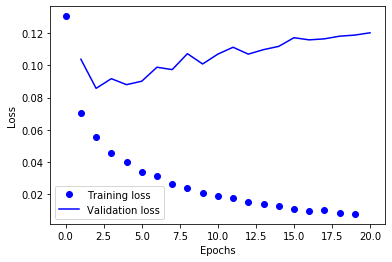

In [27]:
plt.plot([i for i in range(len(loss_values))], loss_values, 'bo', label='Training loss')
plt.plot(range(1, len(val_loss_values) + 1), val_loss_values, 'b', label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()